## Commentary on Twitter:

https://twitter.com/pjhawron/status/1447740094438416389

# Import data and libraries

#### Data from https://basketballdao.com and https://kongstats.com

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime as dt
import warnings 

warnings.filterwarnings("ignore")
% matplotlib inline

In [66]:
data = pd.read_csv("rkl.csv", nrows=10000)
data.head()

,Cumulative Stat Rank,Price,Cumulative,Visual Rarity URL,Kong ID,Shooting,Finish,Defense,Vision,Background,...,Head,Head Accessory,Eyes,Jewellery,Owner Address,Number of Sales,Last Sale Date,Last Sale Price,Last List Date,Current Price
0,2572.0,,218,https://rarity.tools/rumble-kong-league/view/0,0,42,81,41,54,Gold,...,NaN,NaN,Bloodshot,NaN,0x465dca9995d6c2a81a9be80fbced5a770dee3dae,0,,,,
1,4113.0,,204,https://rarity.tools/rumble-kong-league/view/1,1,40,59,53,52,Light Grey,...,Green Beret,NaN,Angry,NaN,0xc212fc9e1a61b8400e0323fde83ed1fe359e3312,0,,,,
2,2461.0,,219,https://rarity.tools/rumble-kong-league/view/2,2,66,60,63,30,Light Blue,...,Green Beret,NaN,Closed,NaN,0x465dca9995d6c2a81a9be80fbced5a770dee3dae,0,,,,
3,1031.0,,237,https://rarity.tools/rumble-kong-league/view/3,3,45,74,55,63,Brown,...,NaN,NaN,Wide Scar,NaN,0xba351b8e093c40df954b9328484036fb271b4d86,0,,,,
4,3889.0,,206,https://rarity.tools/rumble-kong-league/view/4,4,46,45,55,60,Pink,...,Cap Forward,NaN,Regular,NaN,0x05ae0683d8b39d13950c053e70538f5810737bc5,0,,,,


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
Cumulative Stat Rank    9999 non-null float64
Price                   9999 non-null object
Cumulative              10000 non-null int64
Visual Rarity URL       10000 non-null object
Kong ID                 10000 non-null int64
Shooting                10000 non-null int64
Finish                  10000 non-null int64
Defense                 10000 non-null int64
Vision                  10000 non-null int64
Background              10000 non-null object
Fur                     10000 non-null object
Clothes                 8235 non-null object
Mouth                   10000 non-null object
Head                    6622 non-null object
Head Accessory          2768 non-null object
Eyes                    10000 non-null object
Jewellery               62 non-null object
Owner Address           10000 non-null object
Number of Sales         10000 non-null int64
Last Sale Date          10000 no

# Boost Distributions

In [68]:
sns.set_style('darkgrid')
sns.set_palette('plasma')

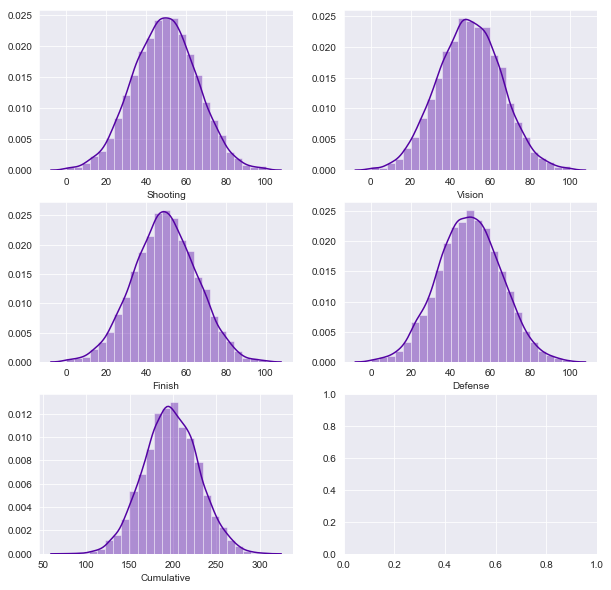

In [69]:
fig, axs = plt.subplots(ncols=2, nrows=3)
fig.set_size_inches(10, 10)
sns.distplot(data['Shooting'], ax=axs[0][0], bins=25)
sns.distplot(data['Vision'], ax=axs[0][1], bins=25)
sns.distplot(data['Finish'], ax=axs[1][0], bins=25)
sns.distplot(data['Defense'], ax=axs[1][1], bins=25)
sns.distplot(data['Cumulative'], ax=axs[2][0], bins=25)

# Formatting Sales Columns

In [70]:
np.where(data['Current Price'].str.contains('ETH'))

(array([   9,   13,   21, ..., 9980, 9984, 9988], dtype=int64),)

In [71]:
np.where(data['Current Price'] != " ")

(array([   9,   13,   21, ..., 9980, 9984, 9988], dtype=int64),)

In [72]:
data.iloc[np.where(data['Current Price'].str.contains('ETH'))].head()

,Cumulative Stat Rank,Price,Cumulative,Visual Rarity URL,Kong ID,Shooting,Finish,Defense,Vision,Background,...,Head,Head Accessory,Eyes,Jewellery,Owner Address,Number of Sales,Last Sale Date,Last Sale Price,Last List Date,Current Price
9,7737.0,20,174,https://rarity.tools/rumble-kong-league/view/9,9,58,39,27,50,Gold,...,RKL Cap Forward,NaN,Angry Scar,NaN,0x07c5e4c12194bc03b4f6397b796df0b6c6e25320,1,8/6/2021,0.75 ETH,9/12/2021 9:08,20.0 ETH
13,7524.0,2.5,176,https://rarity.tools/rumble-kong-league/view/13,13,42,71,52,11,Pink,...,NaN,NaN,Wide,NaN,0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459,0,,,9/14/2021 13:10,2.5 ETH
21,4865.0,5,198,https://rarity.tools/rumble-kong-league/view/21,21,47,49,64,38,Light Blue,...,NaN,Gold Stud,Bloodshot,NaN,0x8757f479276a5a5c1e66555ef6c3ba8c11aac369,1,8/28/2021,1.5 ETH,9/8/2021 14:59,5.0 ETH
24,1153.0,17,235,https://rarity.tools/rumble-kong-league/view/24,24,61,35,47,92,Red,...,RKL Cap Forward,NaN,Regular,NaN,0xb85274215591390155d4ffc7c39f7c05256e6857,1,8/4/2021,0.24 ETH,9/8/2021 4:02,17.0 ETH
30,6739.0,30,183,https://rarity.tools/rumble-kong-league/view/30,30,29,54,42,58,Brown,...,NaN,NaN,Wide,NaN,0x11fb54380e040dc4fdfb99e25c562c0567981a44,3,8/31/2021,1.2 ETH,8/31/2021 3:42,30.0 ETH


In [73]:
print("Listed:", len(data.iloc[np.where(data['Current Price'].str.contains('ETH'))]))
print("Has Sold:", len(data.iloc[np.where(data['Last Sale Price'].str.contains('ETH'))]))

Listed: 1173
Has Sold: 4844


In [74]:
temp1 = data.iloc[np.where(data['Current Price'].str.contains('ETH'))]
temp2 = data.iloc[np.where(data['Last Sale Price'].str.contains('ETH'))]

In [75]:
join = temp1.merge(temp2, how='inner')
join.head()

,Cumulative Stat Rank,Price,Cumulative,Visual Rarity URL,Kong ID,Shooting,Finish,Defense,Vision,Background,...,Head,Head Accessory,Eyes,Jewellery,Owner Address,Number of Sales,Last Sale Date,Last Sale Price,Last List Date,Current Price
0,7737.0,20,174,https://rarity.tools/rumble-kong-league/view/9,9,58,39,27,50,Gold,...,RKL Cap Forward,NaN,Angry Scar,NaN,0x07c5e4c12194bc03b4f6397b796df0b6c6e25320,1,8/6/2021,0.75 ETH,9/12/2021 9:08,20.0 ETH
1,4865.0,5,198,https://rarity.tools/rumble-kong-league/view/21,21,47,49,64,38,Light Blue,...,NaN,Gold Stud,Bloodshot,NaN,0x8757f479276a5a5c1e66555ef6c3ba8c11aac369,1,8/28/2021,1.5 ETH,9/8/2021 14:59,5.0 ETH
2,1153.0,17,235,https://rarity.tools/rumble-kong-league/view/24,24,61,35,47,92,Red,...,RKL Cap Forward,NaN,Regular,NaN,0xb85274215591390155d4ffc7c39f7c05256e6857,1,8/4/2021,0.24 ETH,9/8/2021 4:02,17.0 ETH
3,6739.0,30,183,https://rarity.tools/rumble-kong-league/view/30,30,29,54,42,58,Brown,...,NaN,NaN,Wide,NaN,0x11fb54380e040dc4fdfb99e25c562c0567981a44,3,8/31/2021,1.2 ETH,8/31/2021 3:42,30.0 ETH
4,8552.0,10,164,https://rarity.tools/rumble-kong-league/view/38,38,40,36,37,51,Brown,...,RKL Cap Forward,NaN,Closed Scar,NaN,0x583461ce654c7bd29fded10929deca64887f1131,1,8/6/2021,1.0 ETH,8/8/2021 13:53,10.0 ETH


In [76]:
formatted = join
formatted.head()

,Cumulative Stat Rank,Price,Cumulative,Visual Rarity URL,Kong ID,Shooting,Finish,Defense,Vision,Background,...,Head,Head Accessory,Eyes,Jewellery,Owner Address,Number of Sales,Last Sale Date,Last Sale Price,Last List Date,Current Price
0,7737.0,20,174,https://rarity.tools/rumble-kong-league/view/9,9,58,39,27,50,Gold,...,RKL Cap Forward,NaN,Angry Scar,NaN,0x07c5e4c12194bc03b4f6397b796df0b6c6e25320,1,8/6/2021,0.75 ETH,9/12/2021 9:08,20.0 ETH
1,4865.0,5,198,https://rarity.tools/rumble-kong-league/view/21,21,47,49,64,38,Light Blue,...,NaN,Gold Stud,Bloodshot,NaN,0x8757f479276a5a5c1e66555ef6c3ba8c11aac369,1,8/28/2021,1.5 ETH,9/8/2021 14:59,5.0 ETH
2,1153.0,17,235,https://rarity.tools/rumble-kong-league/view/24,24,61,35,47,92,Red,...,RKL Cap Forward,NaN,Regular,NaN,0xb85274215591390155d4ffc7c39f7c05256e6857,1,8/4/2021,0.24 ETH,9/8/2021 4:02,17.0 ETH
3,6739.0,30,183,https://rarity.tools/rumble-kong-league/view/30,30,29,54,42,58,Brown,...,NaN,NaN,Wide,NaN,0x11fb54380e040dc4fdfb99e25c562c0567981a44,3,8/31/2021,1.2 ETH,8/31/2021 3:42,30.0 ETH
4,8552.0,10,164,https://rarity.tools/rumble-kong-league/view/38,38,40,36,37,51,Brown,...,RKL Cap Forward,NaN,Closed Scar,NaN,0x583461ce654c7bd29fded10929deca64887f1131,1,8/6/2021,1.0 ETH,8/8/2021 13:53,10.0 ETH


In [77]:
formatted['Current Price'] = formatted['Current Price'].str.replace(' ETH', '').astype(float)
formatted['Last Sale Price'] = formatted['Last Sale Price'].str.replace(' ETH', '').astype(float)
formatted.head()

,Cumulative Stat Rank,Price,Cumulative,Visual Rarity URL,Kong ID,Shooting,Finish,Defense,Vision,Background,...,Head,Head Accessory,Eyes,Jewellery,Owner Address,Number of Sales,Last Sale Date,Last Sale Price,Last List Date,Current Price
0,7737.0,20,174,https://rarity.tools/rumble-kong-league/view/9,9,58,39,27,50,Gold,...,RKL Cap Forward,NaN,Angry Scar,NaN,0x07c5e4c12194bc03b4f6397b796df0b6c6e25320,1,8/6/2021,0.75,9/12/2021 9:08,20.0
1,4865.0,5,198,https://rarity.tools/rumble-kong-league/view/21,21,47,49,64,38,Light Blue,...,NaN,Gold Stud,Bloodshot,NaN,0x8757f479276a5a5c1e66555ef6c3ba8c11aac369,1,8/28/2021,1.50,9/8/2021 14:59,5.0
2,1153.0,17,235,https://rarity.tools/rumble-kong-league/view/24,24,61,35,47,92,Red,...,RKL Cap Forward,NaN,Regular,NaN,0xb85274215591390155d4ffc7c39f7c05256e6857,1,8/4/2021,0.24,9/8/2021 4:02,17.0
3,6739.0,30,183,https://rarity.tools/rumble-kong-league/view/30,30,29,54,42,58,Brown,...,NaN,NaN,Wide,NaN,0x11fb54380e040dc4fdfb99e25c562c0567981a44,3,8/31/2021,1.20,8/31/2021 3:42,30.0
4,8552.0,10,164,https://rarity.tools/rumble-kong-league/view/38,38,40,36,37,51,Brown,...,RKL Cap Forward,NaN,Closed Scar,NaN,0x583461ce654c7bd29fded10929deca64887f1131,1,8/6/2021,1.00,8/8/2021 13:53,10.0


In [78]:
formatted = formatted.drop(columns='Price ')
formatted.head()

,Cumulative Stat Rank,Cumulative,Visual Rarity URL,Kong ID,Shooting,Finish,Defense,Vision,Background,Fur,...,Head,Head Accessory,Eyes,Jewellery,Owner Address,Number of Sales,Last Sale Date,Last Sale Price,Last List Date,Current Price
0,7737.0,174,https://rarity.tools/rumble-kong-league/view/9,9,58,39,27,50,Gold,Brown,...,RKL Cap Forward,NaN,Angry Scar,NaN,0x07c5e4c12194bc03b4f6397b796df0b6c6e25320,1,8/6/2021,0.75,9/12/2021 9:08,20.0
1,4865.0,198,https://rarity.tools/rumble-kong-league/view/21,21,47,49,64,38,Light Blue,Pink,...,NaN,Gold Stud,Bloodshot,NaN,0x8757f479276a5a5c1e66555ef6c3ba8c11aac369,1,8/28/2021,1.50,9/8/2021 14:59,5.0
2,1153.0,235,https://rarity.tools/rumble-kong-league/view/24,24,61,35,47,92,Red,Brown,...,RKL Cap Forward,NaN,Regular,NaN,0xb85274215591390155d4ffc7c39f7c05256e6857,1,8/4/2021,0.24,9/8/2021 4:02,17.0
3,6739.0,183,https://rarity.tools/rumble-kong-league/view/30,30,29,54,42,58,Brown,Brown,...,NaN,NaN,Wide,NaN,0x11fb54380e040dc4fdfb99e25c562c0567981a44,3,8/31/2021,1.20,8/31/2021 3:42,30.0
4,8552.0,164,https://rarity.tools/rumble-kong-league/view/38,38,40,36,37,51,Brown,Green,...,RKL Cap Forward,NaN,Closed Scar,NaN,0x583461ce654c7bd29fded10929deca64887f1131,1,8/6/2021,1.00,8/8/2021 13:53,10.0


# Graphing relationships between boosts and last sale price

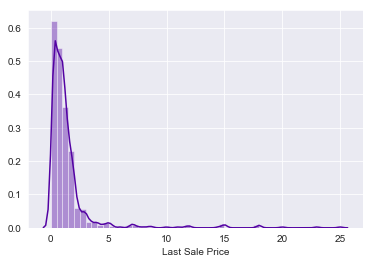

In [79]:
sns.distplot(formatted['Last Sale Price'])

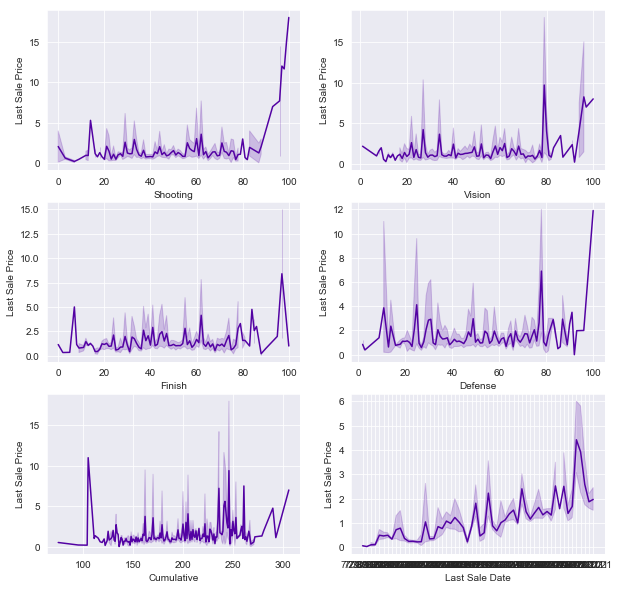

In [80]:
fig, axs = plt.subplots(ncols=2, nrows=3)
fig.set_size_inches(10, 10)
sns.lineplot(x=formatted['Shooting'], y=formatted['Last Sale Price'], ax=axs[0][0])
sns.lineplot(x=formatted['Vision'], y=formatted['Last Sale Price'], ax=axs[0][1])
sns.lineplot(x=formatted['Finish'], y=formatted['Last Sale Price'], ax=axs[1][0])
sns.lineplot(x=formatted['Defense'], y=formatted['Last Sale Price'], ax=axs[1][1])
sns.lineplot(x=formatted['Cumulative'], y=formatted['Last Sale Price'], ax=axs[2][0])
sns.lineplot(x=formatted['Last Sale Date'], y=formatted['Last Sale Price'], ax=axs[2][1])

# Normalize with transformations

In [81]:
print(formatted['Last Sale Price'].mean())
print(formatted['Last Sale Price'].median())
print(formatted['Last Sale Price'].std())

1.4558670787704415
0.94
2.424478647713177


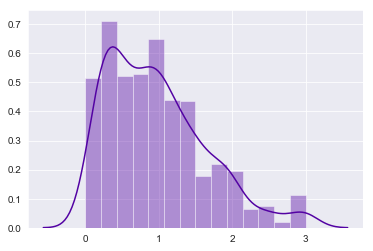

In [82]:
no_outliers = formatted[formatted['Last Sale Price'] <= 3]
sns.distplot(no_outliers[['Last Sale Price']])

In [83]:
transformed = np.sqrt(no_outliers[['Last Sale Price', 'Cumulative', 'Vision', 'Shooting', 'Defense', 'Finish']])
transformed['Last Sale Date'] = no_outliers['Last Sale Date']
transformed.head()

,Last Sale Price,Cumulative,Vision,Shooting,Defense,Finish,Last Sale Date
0,0.866025,13.190906,7.071068,7.615773,5.196152,6.244998,8/6/2021
1,1.224745,14.071247,6.164414,6.855655,8.000000,7.000000,8/28/2021
2,0.489898,15.329710,9.591663,7.810250,6.855655,5.916080,8/4/2021
3,1.095445,13.527749,7.615773,5.385165,6.480741,7.348469,8/31/2021
4,1.000000,12.806248,7.141428,6.324555,6.082763,6.000000,8/6/2021


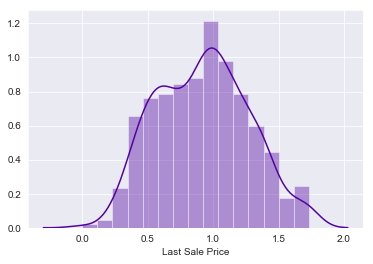

In [84]:
sns.distplot(transformed['Last Sale Price'])

In [85]:
print(transformed['Last Sale Price'].mean())
print(transformed['Last Sale Price'].median())
print(transformed['Last Sale Price'].std())

0.92168745754326
0.938083151964686
0.3505044034621505


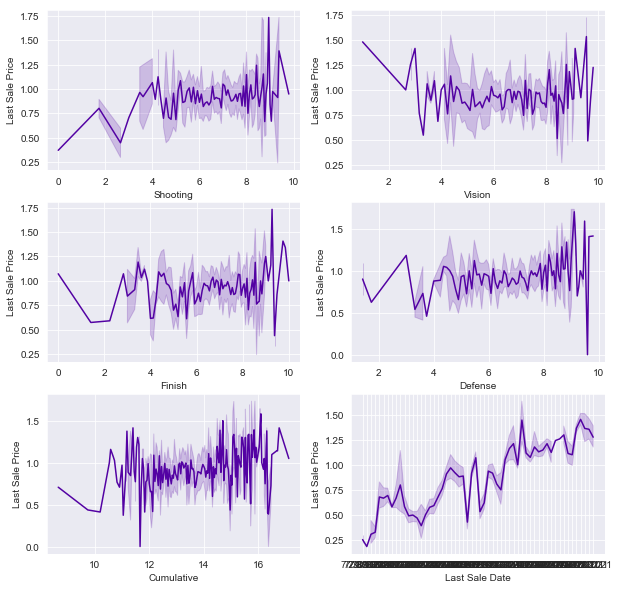

In [86]:
fig, axs = plt.subplots(ncols=2, nrows=3)
fig.set_size_inches(10, 10)
sns.lineplot(x=transformed['Shooting'], y=transformed['Last Sale Price'], ax=axs[0][0])
sns.lineplot(x=transformed['Vision'], y=transformed['Last Sale Price'], ax=axs[0][1])
sns.lineplot(x=transformed['Finish'], y=transformed['Last Sale Price'], ax=axs[1][0])
sns.lineplot(x=transformed['Defense'], y=transformed['Last Sale Price'], ax=axs[1][1])
sns.lineplot(x=transformed['Cumulative'], y=transformed['Last Sale Price'], ax=axs[2][0])
sns.lineplot(x=transformed['Last Sale Date'], y=transformed['Last Sale Price'], ax=axs[2][1])

# Regression to find the importance of cumulative boost value on sales price

## Raw values

In [87]:
X = np.array(formatted['Cumulative']).reshape(-1, 1)
y = formatted['Last Sale Price']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [89]:
clf = LinearRegression()

In [90]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [91]:
print("R-square:", clf.score(X_test, y_test))
print("MSE:", mean_squared_error(y_test, y_pred))

R-square: 0.015229239443702247
MSE: 6.434237559927235


## Square root values

In [92]:
X = np.array(transformed['Cumulative']).reshape(-1, 1)
y = transformed['Last Sale Price']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [94]:
clf = LinearRegression()

In [95]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [96]:
print("R-square:", clf.score(X_test, y_test))
print("MSE:", mean_squared_error(y_test, y_pred))

R-square: 0.015595078080634761
MSE: 0.11933667062726261


# Regression to find the importance of each boost value on sales price

## Raw Values

In [97]:
X = formatted[['Shooting', 'Vision', 'Defense', 'Finish']]
y = formatted['Last Sale Price']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
clf = LinearRegression()

In [100]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [101]:
print("R-square:", clf.score(X_test, y_test))
print("MSE:", mean_squared_error(y_test, y_pred))

R-square: 0.027726254445417875
MSE: 6.352585294718233


## Square root values

In [102]:
X = transformed[['Shooting', 'Vision', 'Defense', 'Finish']]
y = transformed['Last Sale Price']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
clf = LinearRegression()

In [105]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [106]:
print("R-square:", clf.score(X_test, y_test))
print("MSE:", mean_squared_error(y_test, y_pred))

R-square: 0.00032701932129675093
MSE: 0.12118757492356402


# Regression to find the importance of last sale date on price

## Raw Values

In [107]:
formatted['Last Sale Date'] = pd.to_datetime(formatted['Last Sale Date'])
formatted['Last Sale Date'] = formatted['Last Sale Date'].map(dt.datetime.toordinal)

In [108]:
X = np.array(formatted['Last Sale Date']).reshape(-1, 1)
y = formatted['Last Sale Price']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
clf = LinearRegression()

In [111]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [112]:
print("R-square:", clf.score(X_test, y_test))
print("MSE:", mean_squared_error(y_test, y_pred))

R-square: 0.033707502293991776
MSE: 6.313505367587996


## Square root values

In [113]:
transformed['Last Sale Date'] = pd.to_datetime(transformed['Last Sale Date'])
transformed['Last Sale Date'] = transformed['Last Sale Date'].map(dt.datetime.toordinal)

In [114]:
X = np.array(transformed['Last Sale Date']).reshape(-1, 1)
y = transformed['Last Sale Price']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [116]:
clf = LinearRegression()

In [117]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [118]:
print("R-square:", clf.score(X_test, y_test))
print("MSE:", mean_squared_error(y_test, y_pred))

R-square: 0.5046542958163542
MSE: 0.060049381946949726
